# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
%matplotlib inline
import sys
path = '../../scripts/'
sys.path.insert(0,path)
from RipserToDict import ripser_to_dict
from PlotPersistence import plot_persistence

# Parameters

In [2]:
params = dict()
params['dim'] = 2
params['threshold'] = 10
params['n_points'] = 200
params['seed'] = 42
params['max_persistence'] = 2.5

# Functions

In [3]:
def create_torus_distance_matrix(params):
    n_points = params['n_points']
    seed = params['seed']
    
    # create random points
    np.random.seed(seed=seed)
    random_points = 2*np.pi*np.random.rand(2,n_points)
    R4_coords = np.zeros((4,n_points))
    R4_coords[0,:] = np.cos(random_points[0,:])
    R4_coords[1,:] = np.sin(random_points[0,:])
    R4_coords[2,:] = np.cos(random_points[1,:])
    R4_coords[3,:] = np.sin(random_points[1,:])
    
    # calculate distances
    distance_matrix = np.zeros((n_points,n_points))
    for i in range(n_points):
        for j in range(n_points):
            distance_matrix[i,j] = np.sqrt(
            (R4_coords[0,i] - R4_coords[0,j])**2
            + (R4_coords[1,i] - R4_coords[1,j])**2
            + (R4_coords[2,i] - R4_coords[2,j])**2
            + (R4_coords[3,i] - R4_coords[3,j])**2)
            
    params['shape'] = 'torus'
    return distance_matrix, params

# Calculations

In [4]:
distance_matrix, params = create_torus_distance_matrix(params)

In [5]:
# export to temporary file
np.savetxt("temp_distance.txt", distance_matrix, delimiter=",")

In [6]:
!cd ../../../ripser; \
./ripser --format distance --dim {params['dim']} --threshold {params['threshold']} \
../topology_immersion_Henrik/exercises/exercise_3/temp_distance.txt \
> ../topology_immersion_Henrik/exercises/exercise_3/temp_persistence.txt

In [7]:
# extract data
data = ripser_to_dict('temp_persistence.txt',params)

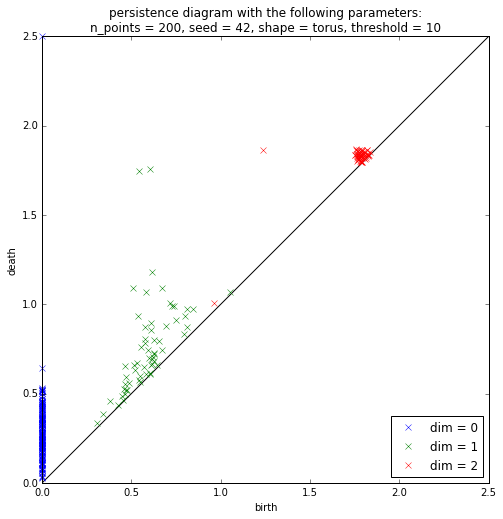

In [8]:
# plot diagrams
fig = plot_persistence(data,params)

In [9]:
# save figure
fig.savefig('plots/' + str(params['seed']) + '.eps')